# Draft analysis 

---

Group name: Group F (Ji Soo Ha & Alexander Hörmann)

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [230]:
import numpy as np
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data

## Import data

In [231]:
df = pd.read_csv('C:/Users/ji_so/Desktop/HA/UNI/HdM/Applied Statistics/Projekt/Second Projekt Idea/Labor_Productivity_Analysis_final.csv',sep=';',decimal=',')

### Data structure

In [232]:
df

,Continent,Country,Code,Year,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Productivity,Current health expenditure per capita
0,Americas,Argentina,ARG,2017,1691.5363,23272.18,44054616,NaN,6.085561,30.955460,2470.11
1,Oceania,Australia,AUS,2017,1731.4943,52536.19,24590336,NaN,7.233995,60.341679,4715.83
2,Europe,Austria,AUT,2017,1613.0519,51954.28,8797497,0.297376,7.195361,64.780170,5641.18
3,Asia,Bangladesh,BGD,2017,2232.3542,4112.70,161793968,NaN,5.114217,4.307637,101.18
4,Europe,Belgium,BEL,2017,1544.2690,45150.20,11384491,0.273880,6.772138,68.516521,5450.48
...,...,...,...,...,...,...,...,...,...,...,...
61,Asia,Turkey,TUR,2017,1832.0000,26611.18,82089824,0.414057,4.872074,41.799203,1166.73
62,Europe,United Kingdom,GBR,2017,1670.2728,44093.93,66064808,0.351488,7.157151,54.676921,4515.59
63,Americas,United States,USA,2017,1757.2255,60116.57,329791232,0.411806,6.943701,71.638571,10103.09
64,Americas,Uruguay,URY,2017,1552.3470,20615.56,3422205,0.394645,6.600337,28.295846,2029.89


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                66 non-null     object 
 1   Country                                  66 non-null     object 
 2   Code                                     66 non-null     object 
 3   Year                                     66 non-null     int64  
 4   Average annual working hours per worker  66 non-null     float64
 5   GDP per capita                           66 non-null     float64
 6   Population                               66 non-null     int64  
 7   gini_coefficient                         48 non-null     float64
 8   Life satisfaction                        65 non-null     float64
 9   Productivity                             65 non-null     float64
 10  Current health expenditure per capita    64 non-null

### Data corrections

In [234]:
# variable Continent is categorical
df['Continent'] = df['Continent'].astype('category')

In [235]:
# variable Country is categorical
df['Country'] = df['Country'].astype('category')

In [236]:
# Drop missing values (see debt_to_income)
df.dropna(inplace=True)

In [237]:
df

,Continent,Country,Code,Year,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Productivity,Current health expenditure per capita
2,Europe,Austria,AUT,2017,1613.0519,51954.28,8797497,0.297376,7.195361,64.780170,5641.18
4,Europe,Belgium,BEL,2017,1544.2690,45150.20,11384491,0.273880,6.772138,68.516521,5450.48
5,Americas,Brazil,BRA,2017,1709.4856,14284.61,208504960,0.533340,6.451149,19.188294,1375.66
6,Europe,Bulgaria,BGR,2017,1643.5475,19579.83,7182430,0.403790,5.108438,25.392122,1607.71
8,Americas,Canada,CAN,2017,1696.4624,48902.64,36554344,0.333082,7.109076,56.255718,5208.72
9,Americas,Chile,CHL,2017,1974.0000,22864.05,18368582,0.444410,5.942250,27.260791,2219.14
10,Asia,China,CHN,2017,2174.3501,13854.23,1410275968,0.390758,5.144120,11.357739,706.37
11,Americas,Colombia,COL,2017,1997.7480,13426.76,48351668,0.497155,6.350298,15.632915,1088.17
12,Americas,Costa Rica,CRI,2017,2212.3835,18127.81,4993849,0.483465,6.997619,18.728041,1439.77
13,Europe,Croatia,HRV,2017,1834.9327,25359.70,4192468,0.303546,5.625744,33.157127,1804.07


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 2 to 64
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Continent                                47 non-null     category
 1   Country                                  47 non-null     category
 2   Code                                     47 non-null     object  
 3   Year                                     47 non-null     int64   
 4   Average annual working hours per worker  47 non-null     float64 
 5   GDP per capita                           47 non-null     float64 
 6   Population                               47 non-null     int64   
 7   gini_coefficient                         47 non-null     float64 
 8   Life satisfaction                        47 non-null     float64 
 9   Productivity                             47 non-null     float64 
 10  Current health expenditure per capita   

### Variable lists

In [239]:
# define outcome variable as y_label
y_label = 'Productivity'

# select features
features = ["Average annual working hours per worker", 
            "GDP per capita",
            "Population",
            "gini_coefficient",
            "Life satisfaction",
            "Current health expenditure per capita"
            ]


# create feature data
X = df[features]

# create response
y = df[y_label]

### Data splitting

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [241]:
X_train

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita
12,2212.3835,18127.81,4993849,0.483465,6.997619,1439.77
6,1643.5475,19579.83,7182430,0.403790,5.108438,1607.71
10,2174.3501,13854.23,1410275968,0.390758,5.144120,706.37
57,1609.2896,52032.67,10058191,0.287746,7.398093,5655.70
46,2028.4952,29047.82,38532816,0.302966,6.242094,1972.37
18,1856.6827,30981.60,1317550,0.303550,6.034641,2241.85
22,2016.8954,26477.58,10692230,0.343520,5.952157,2325.62
62,1670.2728,44093.93,66064808,0.351488,7.157151,4515.59
20,1514.1371,42818.76,64144092,0.316321,6.689644,5059.99
13,1834.9327,25359.70,4192468,0.303546,5.625744,1804.07


In [242]:
# data exploration set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

## Analysis

### Descriptive statistics

In [243]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Average annual working hours per worker,37.0,1.804151e+03,2.563494e+02,1353.886800,1.613052e+03,1.783521e+03,1.997748e+03,2.437863e+03
GDP per capita,37.0,3.400638e+04,1.951846e+04,4762.930000,1.957983e+04,3.043003e+04,4.515020e+04,8.680865e+04
Population,37.0,1.136884e+08,3.160795e+08,479507.000000,5.439418e+06,1.030753e+07,5.228834e+07,1.410276e+09
gini_coefficient,37.0,3.440071e-01,7.042963e-02,0.232378,2.973758e-01,3.163207e-01,3.878526e-01,5.333405e-01
Life satisfaction,37.0,6.413980e+00,9.534856e-01,3.248770,6.000260e+00,6.451149e+00,7.157151e+00,7.780348e+00
Current health expenditure per capita,37.0,3.240130e+03,2.383217e+03,181.530000,1.439770e+03,2.325620e+03,5.450480e+03,1.010309e+04
Productivity,37.0,4.266920e+01,2.606882e+01,4.735484,2.539212e+01,3.462210e+01,6.478017e+01,1.094883e+02


### Exploratory data analysis

In [244]:
alt.Chart(df_train).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']
)

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

In [245]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita'],
    column=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']
).interactive()

alt.RepeatChart(...)

### Relationships

In [246]:
# inspect correlation between outcome and possible predictors
corr = df_train.corr()
corr[y_label].sort_values(ascending=False)

Productivity                               1.000000
GDP per capita                             0.980352
Current health expenditure per capita      0.898485
Life satisfaction                          0.744095
Population                                -0.321787
gini_coefficient                          -0.496877
Average annual working hours per worker   -0.746524
Name: Productivity, dtype: float64

In [247]:
# take a look at all correlations
corr.style.background_gradient(cmap='Blues')

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita,Productivity
Average annual working hours per worker,1.000000,-0.671149,0.333927,0.358698,-0.644917,-0.686490,-0.746524
GDP per capita,-0.671149,1.000000,-0.309999,-0.457773,0.759601,0.908126,0.980352
Population,0.333927,-0.309999,1.000000,0.202878,-0.568573,-0.246294,-0.321787
gini_coefficient,0.358698,-0.457773,0.202878,1.000000,-0.219546,-0.360122,-0.496877
Life satisfaction,-0.644917,0.759601,-0.568573,-0.219546,1.000000,0.725361,0.744095
Current health expenditure per capita,-0.686490,0.908126,-0.246294,-0.360122,0.725361,1.000000,0.898485
Productivity,-0.746524,0.980352,-0.321787,-0.496877,0.744095,0.898485,1.000000


## Model

### Select model

In [248]:
# Choose the linear regression model
reg = LinearRegression()

### Training and validation

In [249]:
# cross-validation with 5 folds
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1

In [250]:
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,24.994464
2,32.687938
3,37.529093
4,35.528422
5,5.505207


In [251]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [252]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,27.249025,13.054565,5.505207,24.994464,32.687938,35.528422,37.529093


### Fit model

In [253]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [254]:
# Intercept 
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )
intercept

,Name,Coefficient
0,Intercept,47.720948


In [255]:
# Slope coefficients
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_}
)
slope

,Name,Coefficient
0,Average annual working hours per worker,-1.702993e-02
1,GDP per capita,1.183650e-03
2,Population,-1.094956e-09
3,gini_coefficient,-1.490838e+01
4,Life satisfaction,-1.450817e+00
5,Current health expenditure per capita,-6.252246e-06


In [256]:
# combine dataframes
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 5)

,Name,Coefficient
0,Intercept,47.72095
1,Average annual working hours per worker,-0.01703
2,GDP per capita,0.00118
3,Population,-0.00000
4,gini_coefficient,-14.90838
5,Life satisfaction,-1.45082
6,Current health expenditure per capita,-0.00001


In [257]:
# Make predictions on the data
y_pred = reg.predict(X)

In [258]:
mean_squared_error(y, y_pred).round(3)

35.599

### Evaluation on test set

In [259]:
# obtain predictions
y_pred = reg.predict(X_test)

In [260]:
# R squared
r2_score(y_test, y_pred).round(5)

0.67909

In [261]:
# MSE
mean_squared_error(y_test, y_pred).round(5)

113.79038

In [262]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False).round(5)

10.66726

In [263]:
# MAE
mean_absolute_error(y_test, y_pred).round(5)

7.35264

### Check for multicollinearity

C:\Users\ji_so\AppData\Local\Temp\ipykernel_15248\1835051848.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


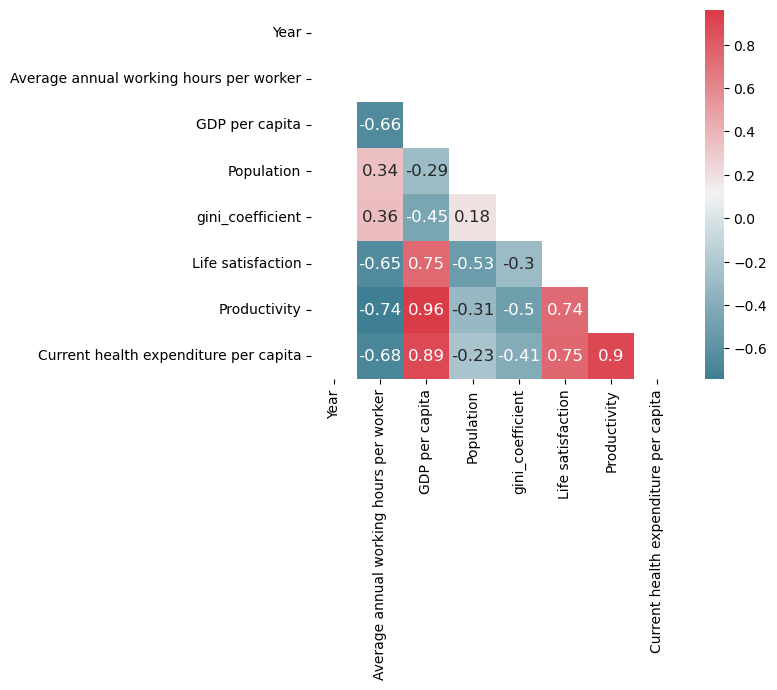

In [264]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

### Variance inflation factor (VIF)
- The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
- VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.

In [265]:
# choose features and add constant
features = add_constant(df[['Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']])
# create empty DataFrame
vif = pd.DataFrame()
# calculate vif
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# add feature names
vif["Feature"] = features.columns

vif.round(2)

,VIF Factor,Feature
0,344.87,const
1,2.11,Average annual working hours per worker
2,5.41,GDP per capita
3,1.56,Population
4,1.30,gini_coefficient
5,3.59,Life satisfaction
6,5.83,Current health expenditure per capita


We have a problematic amount of collinearity in our data.
- Current health expenditure per capita

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions